# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score,\
ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier



### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
data = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Gather basic information about the data

In [3]:
# Gather basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
data.rename(columns = {'promotion_last_5years': 'promoted_5yrs',
                       'average_montly_hours': 'avg_monthly_hours',
                       'time_spend_company': 'tenure',
                       'Work_accident': 'work_accident',
                       'Department': 'department',
                       'last_evaluation': 'last_eval_level',
                       'number_project': 'current_proj_num'}, inplace = True)



# Display all column names after the update
data.columns

Index(['satisfaction_level', 'last_eval_level', 'current_proj_num',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left', 'promoted_5yrs',
       'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values
data.isna().sum()

satisfaction_level    0
last_eval_level       0
current_proj_num      0
avg_monthly_hours     0
tenure                0
work_accident         0
left                  0
promoted_5yrs         0
department            0
salary                0
dtype: int64

### Check duplicates

In [8]:
# Check for duplicates
data.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
new_data = data.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
print(new_data.shape)
new_data.head()

(11991, 10)


,satisfaction_level,last_eval_level,current_proj_num,avg_monthly_hours,tenure,work_accident,left,promoted_5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

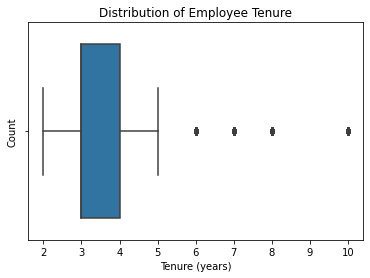

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x = new_data['tenure'])
plt.xlabel('Tenure (years)')
plt.ylabel('Count')
plt.title('Distribution of Employee Tenure')

plt.show()

In [12]:
# Determine the number of rows containing outliers
quarter = new_data['tenure'].quantile(.25)
three_quarter = new_data['tenure'].quantile(.75)
IQR = three_quarter - quarter

upper_limit = three_quarter + 1.5*IQR
lower_limit = quarter - 1.5*IQR

outliers = new_data[(new_data['tenure'] < lower_limit) | (new_data['tenure'] > upper_limit)]
print('Number of rows with outlier tenure value: ', len(outliers))

Number of rows with outlier tenure value:  824


## Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(new_data['left'].value_counts())

# Get percentages of people who left vs. stayed
print(new_data['left'].value_counts(normalize = True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

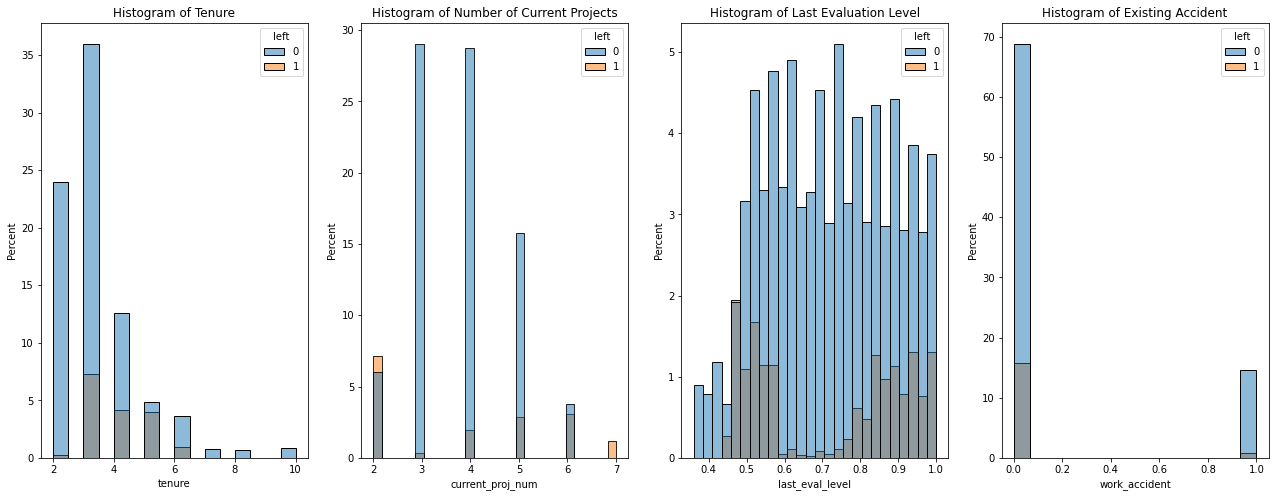

In [14]:
# We will start with several histograms for a general understanding of the column distributions
fig, ax = plt.subplots(1, 4, figsize = (22,8))

# Creates histogram for 'tenure' and which employees stayed/left
sns.histplot(data=new_data, x='tenure', binwidth=.5, stat='percent', hue='left', ax=ax[0])
ax[0].set_title('Histogram of Tenure')

# Creates histogram for 'tenure' and which employees stayed/left
sns.histplot(data=new_data, x='current_proj_num', stat='percent', hue='left', ax=ax[1])
ax[1].set_title('Histogram of Number of Current Projects')

# Creates histogram for 'tenure' and which employees stayed/left
sns.histplot(data=new_data, x='last_eval_level', stat='percent', hue='left', ax=ax[2])
ax[2].set_title('Histogram of Last Evaluation Level')

# Creates histogram for 'tenure' and which employees stayed/left
sns.histplot(data=new_data, x='work_accident', stat='percent', hue='left', ax=ax[3])
ax[3].set_title('Histogram of Existing Accident')

# Display the plots
plt.show()

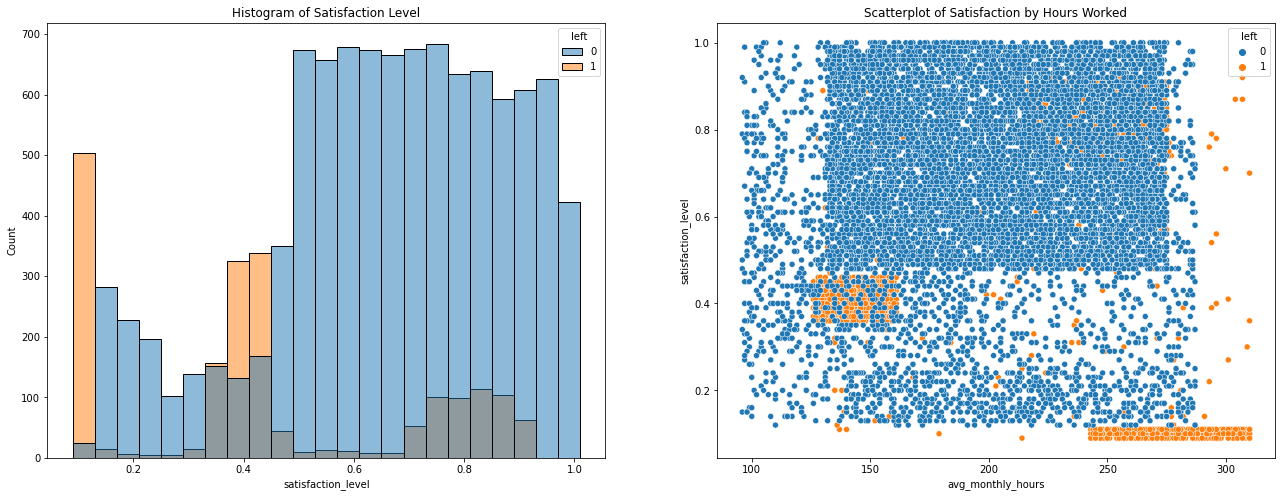

In [15]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Creates histogram to show 'satisfaction_level' of employees who stayed/left
sns.histplot(data=new_data, x='satisfaction_level', hue='left', binwidth = .04, ax=ax[0])
ax[0].set_title('Histogram of Satisfaction Level')

# Creates scatterplot showing 'satisfaction_level' compared with 'avg_monthly_hours' for employees who stayed/left
sns.scatterplot(data=new_data, x='avg_monthly_hours', y = 'satisfaction_level', hue='left', ax=ax[1])
ax[1].set_title('Scatterplot of Satisfaction by Hours Worked')

# Display the plots
plt.show()

First plot: The plot indicates 3 satisfaction levels/intervals in which employees leave: .1, (.35,.45), or (.7,.9). To minimize employees leaving it will be important to know what other factors coincide with employees having near .1 or .4 satisfaction levels. <p>
Second plot: With the context of the first graph, we can see that almost all leaving employees with satisfaction levels near .1 are working the longest hours of all employees. It seems that around 240 hours is when we start to see the trend of high hours coinciding with leaving the company. There are also a big chunk of employees with low satisfaction that are working less than 150 average monthly hours. This could be employees who have been let go and are having their hours reduced while the company adapts to their absence, so it is hard to know what to think of this group without more info. There are also similar numbers of employees who left with high working hours split between satisfaction levels around .8 vs .4.

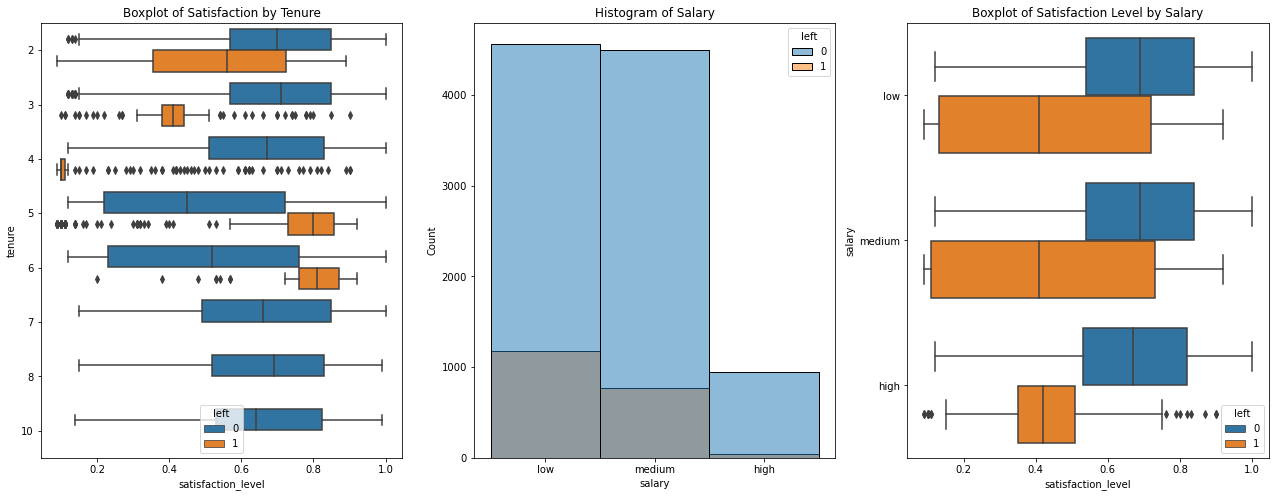

In [16]:
# Create a plot as needed
fig, ax = plt.subplots(1, 3, figsize = (22,8))

# Creates boxplot to show 'satisfaction_level' for different 'tenure' durations
sns.boxplot(data=new_data, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].set_title('Boxplot of Satisfaction by Tenure')

# Creates histogram showing 'salary' categories for employees that stayed/left
sns.histplot(data=new_data, x='salary', hue='left', ax=ax[1])
ax[1].set_title('Histogram of Salary')

# Creates boxplot of 'satisfaction_level' by 'salary' category for employees who stayed/left
sns.boxplot(data=new_data, x='satisfaction_level', y='salary', hue='left', ax=ax[2])
ax[2].set_title('Boxplot of Satisfaction Level by Salary')

# Display the plots
plt.show()

First plot: From our previous analysis we saw the 3 categories of satisfaction levels where employees leave: (.1, .45, .8). Now here when broken down by tenure it appears that a significant number of .1 satisfaction level people who leave have tenure years 2 and 4, for levels around .4 we see year 3 and a little of year 2 playing a big role, and then for the high satisfaction employees that leave, the plot shows many of them leave after 5 or 6 years of employment. We should keep in mind that year 2 has an especially wide variance for the satisfaction levels of those who leave. <p>
Second plot: The histogram shows that high salary employees leave in small numbers, and for employees with medium or low salaries, there is a significant decrease in the proportion that leave when their salary is medium (about a third less seem to leave). We should also note that we have about the same number of employees with low vs medium salaries. <p>
Third plot: The plot shows that for high salary employees, it is often the case that they leave around the .4 satisfaction level. The other 2 salary categories have similar boxplots for their leaving employees, with significant variance across different satisfaction levels. Interesting to note is that none of the salary levels had a big claim on the employees who leave with high satisfaction levels (~.8). I would've thought that high salary employees would be more satisfied when they left, but that does not appear to be the case, and low salary employees have significant claim on the employees that leave with high satisfaction levels.

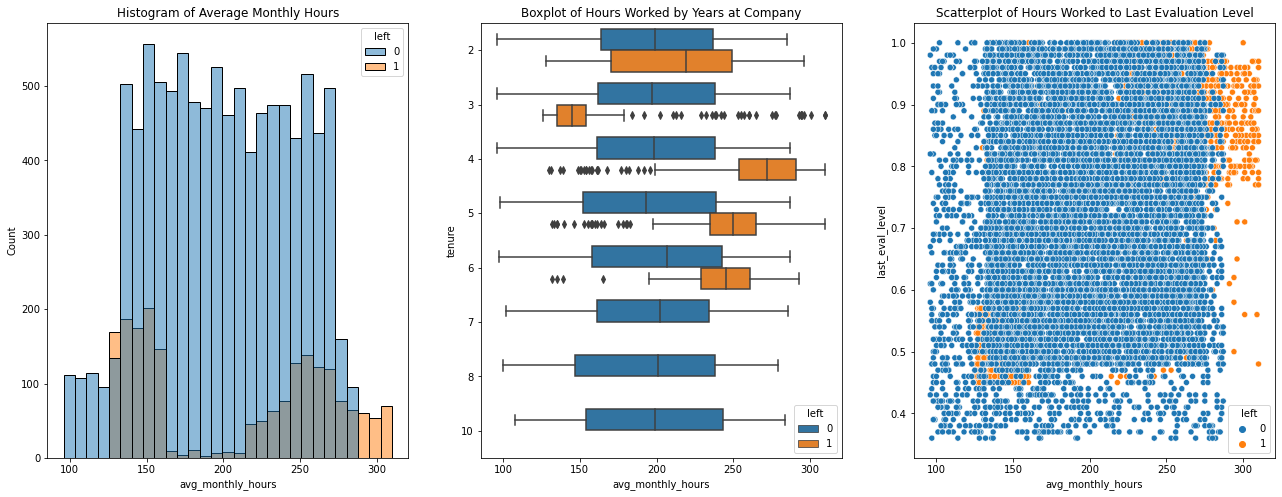

In [17]:
# Create a plot as needed
fig, ax = plt.subplots(1, 3, figsize = (22,8))

# Creates histogram for 'avg_monthly_hours'
sns.histplot(data=new_data, x='avg_monthly_hours', hue='left', ax=ax[0])
ax[0].set_title('Histogram of Average Monthly Hours')

# Creates boxplot showing 'avg_monthly_hours' by 'tenure' and which employees stayed/left
sns.boxplot(data=new_data, x='avg_monthly_hours', y='tenure', hue='left', orient='h', ax=ax[1])
ax[1].set_title('Boxplot of Hours Worked by Years at Company')

# Creates scatterplot showing 'avg_monthly_hours' by 'last_eval_level' and which employees stayed/left
sns.scatterplot(data=new_data, x='avg_monthly_hours', y='last_eval_level', hue='left', ax=ax[2])
ax[2].set_title('Scatterplot of Hours Worked to Last Evaluation Level')

# Display the plots
plt.show()

First plot: We see what we saw in the scatterplot in the first graphs: that the 2 big categories of employees who leave work either over 240 average monthly hours or less than 150. Again, it is hard to know whether these low-hour employees only worked that much as part of their normal work routine or if they were being transitioned out of the company. They could also be hourly workers who are making very little because of the lower hours worked (it is worth noting that 150 monthly hours still averages 7 hours per shift, 5 shifts a week), either way we notice a significantly minimized proportion of employees leaving when they work between 160-210 average monthly hours <p>
Second plot: The boxplot shows a very consistent median average monthly hours worked at around 200 for employees who stay. We also notice for years 4, 5, and 6 the median hours for employees that leave is around 240-260, but for years 2 and 3 employees who leave often work significantly less monthly hours. <p>
Third plot: In this plot we get further insight into the 2 groups who leave: less than 150 hours vs greater than 240 hours. The employees who worked the lesser hours have pretty poor evaluation levels, which may indicate that these employees were let go by the company, and possibly transitioned out. However, for the high hours employees who leave they consistently have great evaluation levels. It is impossible to know from the data, but it would be interesting to know whether their evaluation levels were indicative of great quality of work, or just the high hours they dedicated.

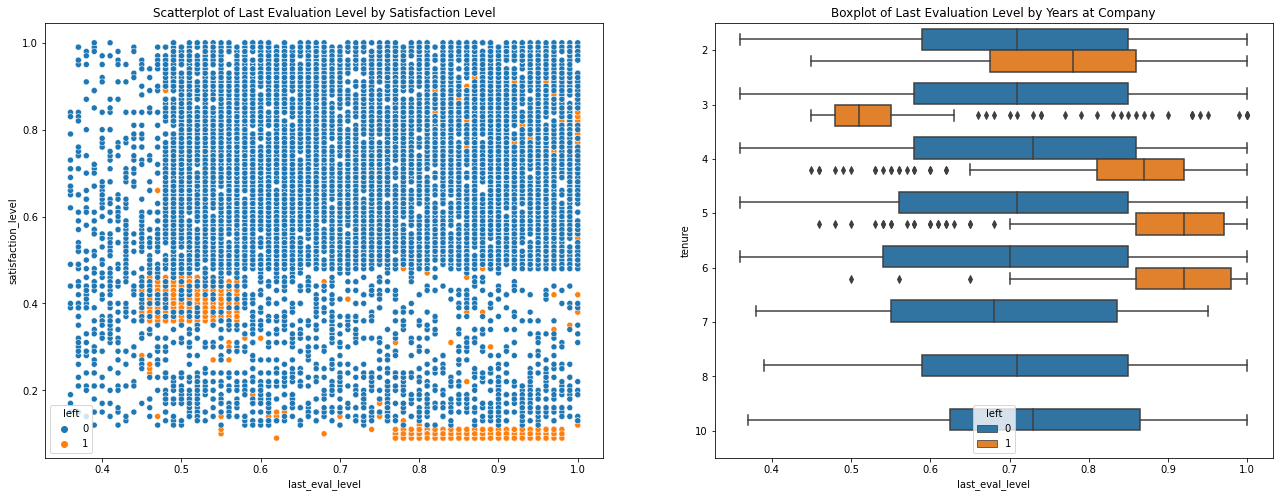

In [18]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Creates scatterplot of 'last_eval_level' by 'satisfaction_level' for employees who stayed/left
sns.scatterplot(data=new_data, x='last_eval_level', y='satisfaction_level', hue='left', ax=ax[0])
ax[0].set_title('Scatterplot of Last Evaluation Level by Satisfaction Level')

# Creates boxplot of 'last_eval_level' by 'tenure' years at the company for employees who stayed/left
sns.boxplot(data=new_data, x='last_eval_level', y='tenure', hue='left', orient='h', ax=ax[1])
ax[1].set_title('Boxplot of Last Evaluation Level by Years at Company')

# Display the plots
plt.show()

First plot: The scatterplot shows once again the groups of employees who leave with satisfaction around .4 and .1, but while high evaluation employees tend to have incredibly low satisfaction, the lower evaluation employees have the higher .4 satisfaction level. The additional smaller groups of employees who leave seem to have high evaluation levels and high satisfaction around .8, high evaluation levels and .4 satisfaction, or low evaluation levels and lower satisfaction around .2. For employees who stay there is a very consistently defined rectangle in the data between last_eval_level: (.5, 1) and satisfaction_level (.5,1).<p>
Second plot: The boxplot shows consistently through all years of tenure the median evaluation level for employees who stay is around .7. With the added variable of evaluation level, we see that for employees that leave after 4, 5, and 6 years of tenure, they have high evaluation levels (around .9). Year 2 employees that leave also have higher evaluation levels around .75, but for the 3 years employees, their evaluation levels are very low, around .5. This could be indicative of the group of employees who might be being transitioned out of the company because of their low evaluation levels, and thus they have low work hours and satisfaction rates.

The percentage of employees promoted in the last 5 years is:  0    0.983071
1    0.016929
Name: promoted_5yrs, dtype: float64


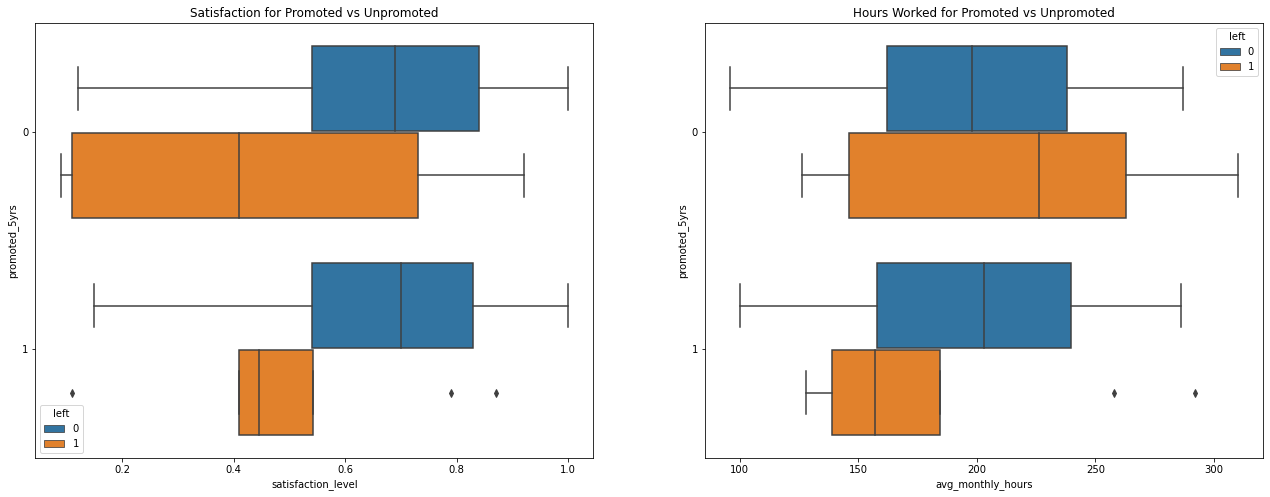

In [19]:
# Create a plot as needed
percent_promoted = new_data['promoted_5yrs'].value_counts(normalize=True)
print('The percentage of employees promoted in the last 5 years is: ', percent_promoted)

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Creates boxplot showing 'satisfaction_level' distributions by 'promoted_5yrs' values, comparing employees who stayed/left
sns.boxplot(data=new_data, x='satisfaction_level', y='promoted_5yrs', hue='left', orient='h', ax=ax[0])

ax[0].set_title('Satisfaction for Promoted vs Unpromoted')

# Creates boxplot showing 'avg_monthly_hours' distributions by 'promoted_5yrs' values, comparing employees who stayed/left
sns.boxplot(data=new_data, x='avg_monthly_hours', y='promoted_5yrs', hue='left', orient = 'h', ax=ax[1])
ax[1].set_title('Hours Worked for Promoted vs Unpromoted')

# Display the plots
plt.show()

First plot: A very small percentage of employees have been promoted in the last 5 years, and our first graph only shows that for leaving employees, the promoted ones have satisfaction levels around .4 instead of .1 for those not promoted. <p>
Second plot: For some reason the promoted employees who leave the company have a singificant drop in their average monthly hours. When not promoted, the employees that work significantly more tend to be the ones who leave, but the opposite is the case for promoted employees.

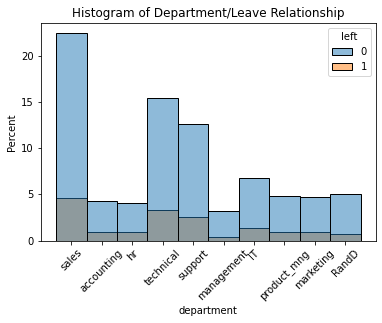

In [20]:
# Creates histogram (showing percent of value counts) for different departments
sns.histplot(data=new_data, x='department', stat = 'percent', hue='left')
plt.xticks(rotation=45)
plt.title('Histogram of Department/Leave Relationship')

plt.show()

The histogram shows very similar proportions of employees leaving to employees staying in all departments. Department does not seem like a helpful variable in determining who will stay, and it doesn't really work regardless for a business to just hire for certain departments.

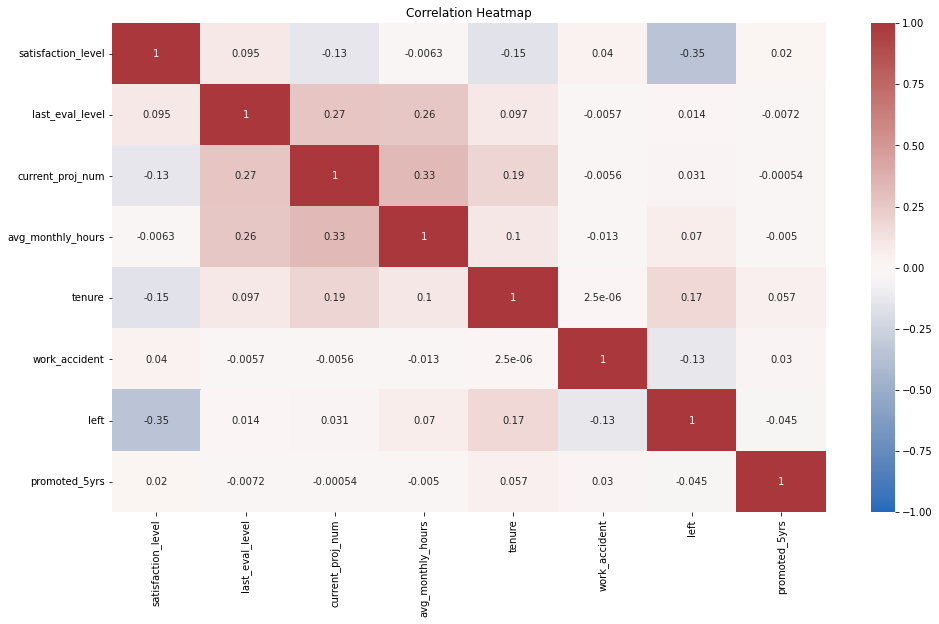

In [21]:
# Plots a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(new_data.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap');

### Insights

The 2 biggest indicators of leaving seemed to be long hours and low satisfaction levels. We still are not sure about the large group of employees that leave after 3 years with low working hours. If we assume they are let go, because they have low evaluation scores, then to target the employees we are interested in retaining it would be best to prioritize work hours moderation. Hours worked didn't seem to change much over the tenure variable, but by year 6 it seems most employees who would quit because of long hours had done so already.

### Identify the types of models most appropriate for this task.

We will use a logistic regression model since it is designed for such a prediction. Logistic regression models are sensitive to outlier influence however, and our descriptive statistics table showed tenure having a singificant distance between the third quartile and max value, so we will need to remove tenure's outliers. Additionally, we will need to check that the variables do not show significant multicollinearity.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
# Encode categorical variables
enc_data = new_data.copy()

# Use ordinal encoding of salary
enc_data['salary'] = (enc_data['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

# Encode deparment columns with dummy columns
enc_data = pd.get_dummies(enc_data, drop_first=False)

enc_data.head()

,satisfaction_level,last_eval_level,current_proj_num,avg_monthly_hours,tenure,work_accident,left,promoted_5yrs,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
# Remove previously defined tenure outliers
df = enc_data.drop(outliers.index)
print(df.shape)
df.head()

(11167, 19)


,satisfaction_level,last_eval_level,current_proj_num,avg_monthly_hours,tenure,work_accident,left,promoted_5yrs,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


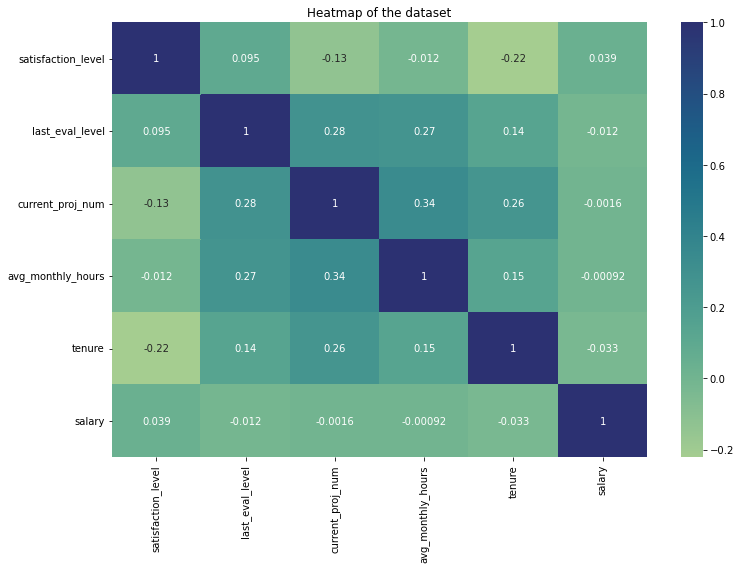

In [24]:
# Create correlation matrix for variables that our previous analysis made appear as promising candidates
plt.figure(figsize=(12,8))
sns.heatmap(df[['satisfaction_level', 'last_eval_level', 'current_proj_num', 'avg_monthly_hours', 'tenure', 'salary']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

With no value in the matrix greater than .4, we can comfortably move forward with the assumption of little multicollinearity satisfied.

In [25]:
# Separate predictors to be used in model
X = df.drop('left', axis=1)
X.head()

,satisfaction_level,last_eval_level,current_proj_num,avg_monthly_hours,tenure,work_accident,promoted_5yrs,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
#Isolate 'left'
y = df['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [27]:
# Split data into training and test sets (stratify y because of class imbalance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [28]:
# Fit a logistic regression model using the training dataset
log_mod = LogisticRegression(random_state=0, max_iter=500).fit(X_train, y_train)

In [29]:
# Get a prediction from the model on the test set
y_pred = log_mod.predict(X_test)

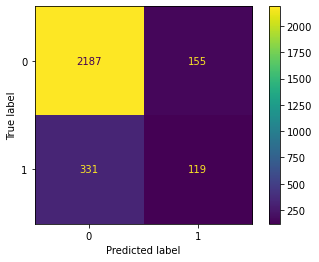

In [30]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_mod.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_mod.classes_)
disp.plot(values_format='')

plt.show()

In [31]:
# Create classification report
names = ['Predicted Stay', 'Predicted Leave']
print(classification_report(y_test, y_pred, target_names=names))

                 precision    recall  f1-score   support

 Predicted Stay       0.87      0.93      0.90      2342
Predicted Leave       0.43      0.26      0.33       450

       accuracy                           0.83      2792
      macro avg       0.65      0.60      0.61      2792
   weighted avg       0.80      0.83      0.81      2792



Given our goal is to predict which employees are going to leave, the logistic regression model performed horribly. It had very high precision and recall towards the prediction of who would stay, but that was a much less important prediction. We will progress by making a random forest model that hopefully is much better at predicting which employees left.

In [32]:
# Split training data into validation set
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=0)

In [33]:
# Instantiate random forest
rf = RandomForestClassifier(random_state=0)

# Create list of parameters and values for grid search
cv_params = {'n_estimators' : [200,300],
            'max_depth' : [7,14],
            'min_samples_leaf' : [1,2],
            'min_samples_split' : [3],
            'max_features' : [1],
            'max_samples' : [.7,.9]}

# Create list of scoring metrics to be used
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']

# Instantiate grid seach
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [34]:
%%time
rf_cv.fit(X_tr, y_tr)

CPU times: user 53.5 s, sys: 0 ns, total: 53.5 s
Wall time: 53.5 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [35]:
# Get best auc score from CV
rf_cv.best_score_

0.9826407510830455

In [36]:
# Get the optimal parameter values
rf_cv.best_params_

{'max_depth': 14,
 'max_features': 1,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [37]:
def metric_results(model_object, metric:str):
    '''
    Arguments:
        model_object: the fit model as GridSearchCV
        metric: the chosen evaluation metric as string
        
    Returns a dataframe with recall, precision, accuracy, f1, and auc values provided by the model that
    performed best, with respect to the mean of the provided metric, across all validation folds.
    '''
    metric_dict = {'auc' : 'mean_test_roc_auc',
                   'precision' : 'mean_test_precision',
                   'recall' : 'mean_test_recall',
                   'f1' : 'mean_test_f1',
                   'accuracy' : 'mean_test_accuracy'}
    # Make dataframe to store metrics
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Identify the row with the max chosen metric value
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Collect all other metric values from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision,
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Compile results in table
    table = pd.DataFrame({'precision' : [precision],
                          'recall' : [recall],
                          'f1' : [f1],
                          'accuracy' : [accuracy],
                          'auc' : [auc]})
    
    return table

In [38]:
# Save and display the mean metric values for all evaluation metrics
rf_cv_results = metric_results(rf_cv, 'auc')
rf_cv_results

,precision,recall,f1,accuracy,auc
0,"(0.9805700747229869,)",0.867371,0.920351,0.974685,0.982641


In [39]:
y_pred = rf_cv.best_estimator_.predict(X_test)

In [40]:
# Get metric values for model predictions vs test set
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Put scores in dataframe
scores = pd.DataFrame({'precision' : [precision],
                      'recall' : [recall],
                      'accuracy' : [accuracy],
                      'f1' : [f1],
                      'auc' : [auc]})
scores

,precision,recall,accuracy,f1,auc
0,0.966408,0.831111,0.968123,0.893668,0.91278


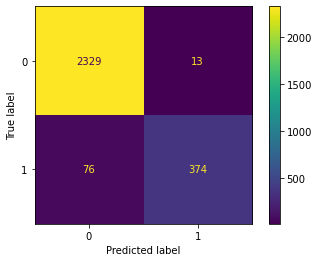

In [41]:
# Create confusion matrix object
cm = confusion_matrix(y_test, y_pred, labels=rf_cv.classes_)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)

# Plot display
disp.plot(values_format='')

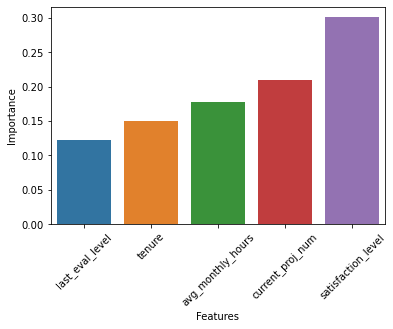

In [42]:
# Filter top 5 feature importances
feat = rf_cv. best_estimator_.feature_importances_
top5 = np.argpartition(feat, -5)[-5:]

# Create dataframe ordered by importance level
cols = X.columns[top5]
imps = feat[top5]
imp_df = pd.DataFrame({'Importance':imps, 'Features':cols})
sort = imp_df.sort_values('Importance')

# Create bar graph with top 5 features
plt.xticks(rotation=45)
sns.barplot(data=sort, x='Features', y='Importance')

# Plot bar graph
plt.show()

This model performed significantly better than the logistic regression model, landing a recall score of .83 for predicting employees who left. It also performed excellently with its auc score of .91; again it was great at predicting employees who stay, but that is not the main priority. In order to further increase the predictive power of the model we could try more feature engineering. <p>
It could be beneficial to remove some data that would include employees that we are not interested in retaining, in particular the year 3, low evaluation, low work hours group. We will filter the avg_monthly_hours column for only those above 170 hours. Additionally, satisfaction data is likely only provided by employees who choose to fill it out, or if they are forced to might give innaccurate data, so we will drop it and proceed.

In [43]:
# Drop satisfaction level
newX = df.drop('satisfaction_level', axis=1)

# Filter for employees who work more than 170 monthly hours with new column
newX['not_fired_hours'] = (newX['avg_monthly_hours'] > 170)
y = newX['left']
X = newX.drop(['avg_monthly_hours', 'left'], axis=1)

In [44]:
# Split data into training, test, and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=0)

In [45]:
# Instantiate random forest
rf = RandomForestClassifier(random_state=0)

# Create list of parameters and values for grid search
cv_params = {'n_estimators' : [200,300],
            'max_depth' : [7,14],
            'min_samples_leaf' : [1,2],
            'min_samples_split' : [3],
            'max_features' : [1],
            'max_samples' : [.7,.9]}

# Create list of scoring metrics to be used
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']

# Instantiate grid seach
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [46]:
# Fit the model
rf_cv.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [47]:
# Get mean metric values across different validation folds
rf_cv_results = metric_results(rf_cv, 'auc')
rf_cv_results

,precision,recall,f1,accuracy,auc
0,"(0.921466671788609,)",0.820321,0.867715,0.95781,0.97136


In [48]:
# Compare predicted 'left' values to the test data
y_pred = rf_cv.best_estimator_.predict(X_test)

# Calculate metrics comparing model to test data
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Put scores in dataframe
scores = pd.DataFrame({'precision' : [precision],
                      'recall' : [recall],
                      'accuracy' : [accuracy],
                      'f1' : [f1],
                      'auc' : [auc]})
scores

,precision,recall,accuracy,f1,auc
0,0.922111,0.815556,0.959169,0.865566,0.90116


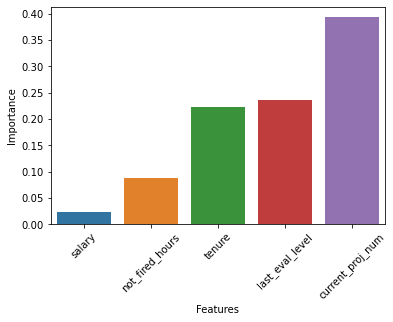

In [49]:
# Filter top 5 feature importances
feat = rf_cv. best_estimator_.feature_importances_
top5 = np.argpartition(feat, -5)[-5:]

# Create dataframe ordered by importance level
cols = X.columns[top5]
imps = feat[top5]
imp_df = pd.DataFrame({'Importance':imps, 'Features':cols})
sort = imp_df.sort_values('Importance')

# Create bar graph with top 5 features
plt.xticks(rotation=45)
sns.barplot(data=sort, x='Features', y='Importance')

# Plot bar graph
plt.show()

Since the feature engineering resulted in a worse model, towards the prediction of whether employees leave, we will stick with the original random forest model.

### Summary of model results

Our champion random forest model performed pretty well at predicting which employees would leave, with a recall of .83 and auc score of .91. The feature importance graph indicated that satisfaction level was the most important variable for predicting whether an employee leaves, and during EDA we learned quite a lot about which employees become disatisfied. In order of importance (most to least) the top 5 relevant features were: (satisfaction_level, current_proj_num, avg_monthly_hours, tenure, last_eval_level).

### Conclusion, Recommendations, Next Steps

Besides the group with low hours who left with 3 years of tenure, it seemed that most disatisfied employees had long work hours, in particular above 240 average monthly hours saw a significant proportion of employees started giving satisfaction levels near .1. Given how a significant number of satisfaction levels dropped after employees started working above 240 average monthly hours, the company could possibly financially benefit from having high work hours employees work less. There would be a financial loss from the fewer hours worked, but a significant number of these employees end up leaving, so we must also consider the cost of recruiting and training. Additionally, the histograms at the start of the visualization creation showed that about half of employees working 6 current projects left and all of those working on 7 current projects left. Given the model listed current_proj_num as 2nd most important, we could also probably significantly increase retention of high evaluation employees by ensuring they don't work on more than 5 projects at any time.